# Tests Results Evaluation

In [1]:
BASE_TEST_DIR = "..\\tests"

### Tests data aggregation

In [2]:
import pandas as pd
import os

test_dirs = os.listdir(BASE_TEST_DIR)

# Load and add a column to identify each file
dfs = []
for idx, test_dir in enumerate(test_dirs):
    eval_path = os.path.join(BASE_TEST_DIR, test_dir, "evaluations.csv")
    df = pd.read_csv(eval_path)
    df['test_id'] = f"test_{idx+1}"
    dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.head()

,data_label,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1,test_id
0,strategy_0_test,0.999594,0.999915,0.999754,0.174545,0.042328,0.068133,test_1
1,strategy_1_test,0.999598,0.999885,0.999741,0.160763,0.052028,0.078614,test_1
2,strategy_2_test,0.999599,0.999887,0.999743,0.170330,0.054674,0.082777,test_1
3,strategy_3_test,0.999594,0.999934,0.999764,0.222222,0.044092,0.073584,test_1
4,strategy_4_test,0.999597,0.999884,0.999741,0.157609,0.051146,0.077230,test_1


### Plot the tests results

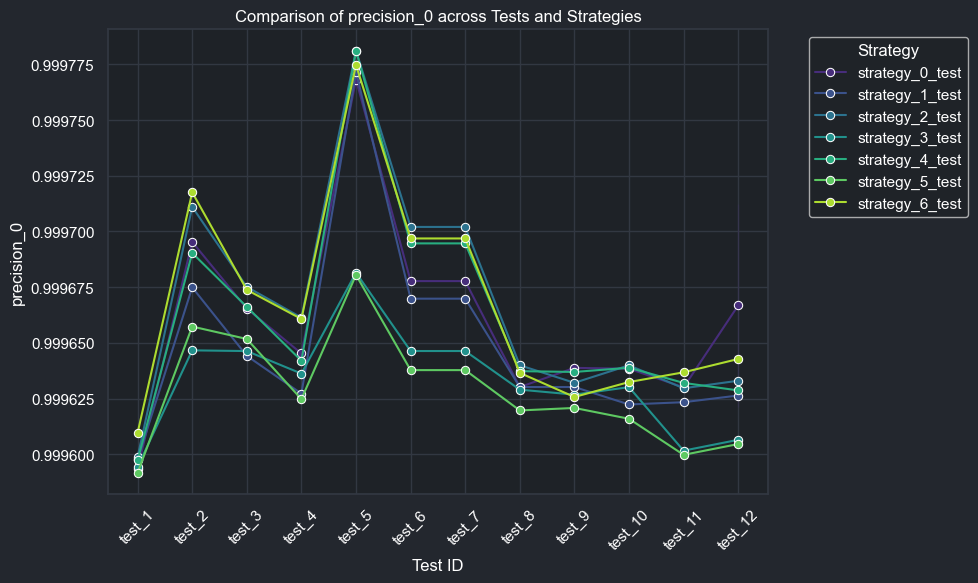

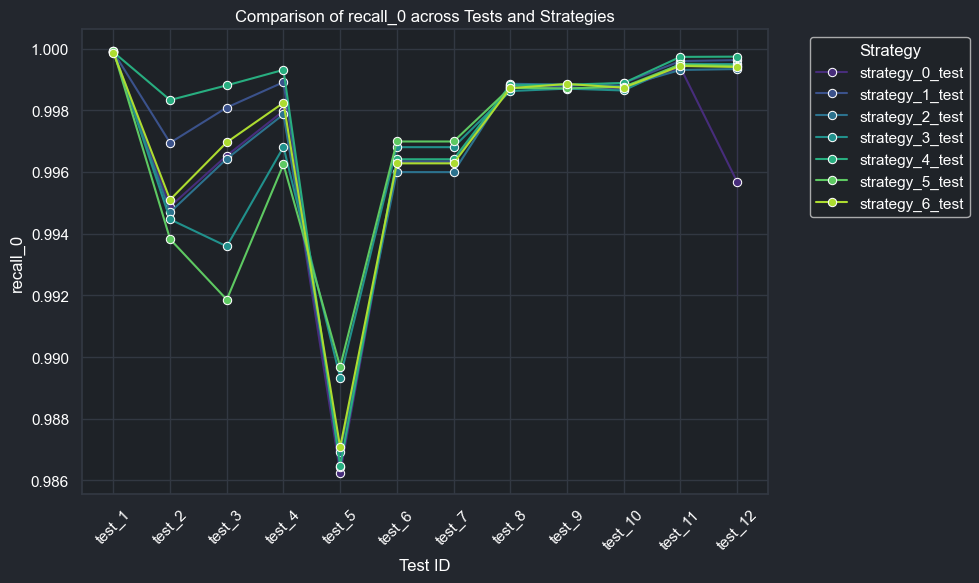

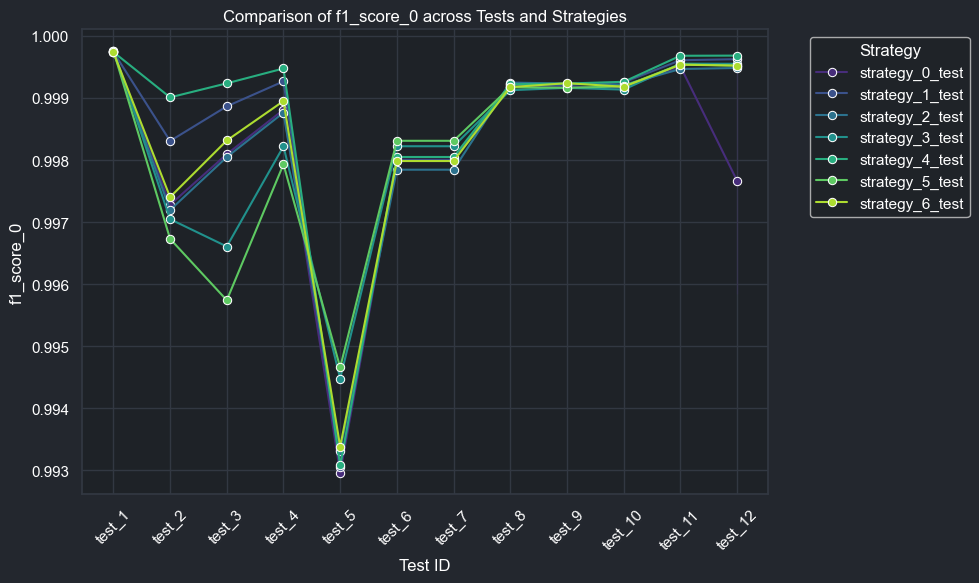

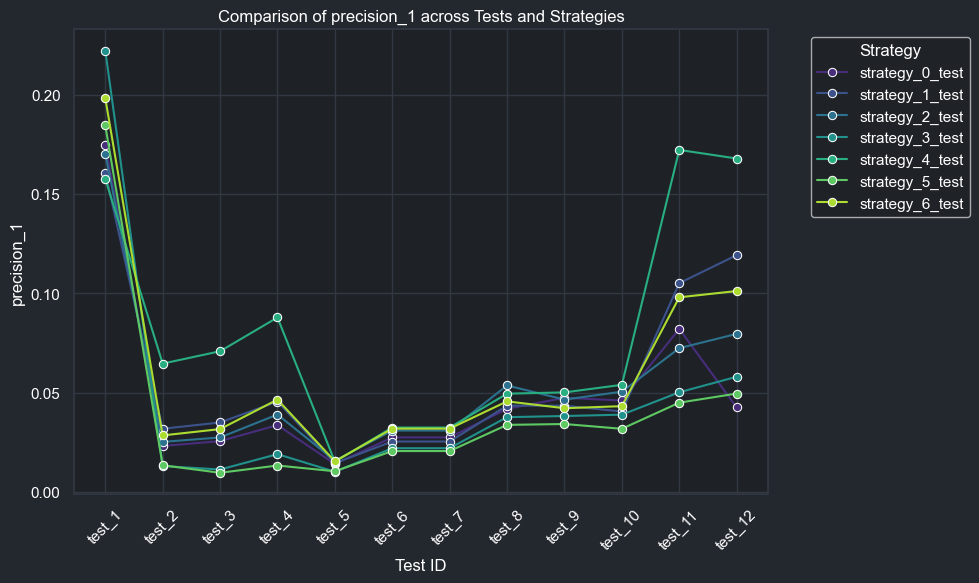

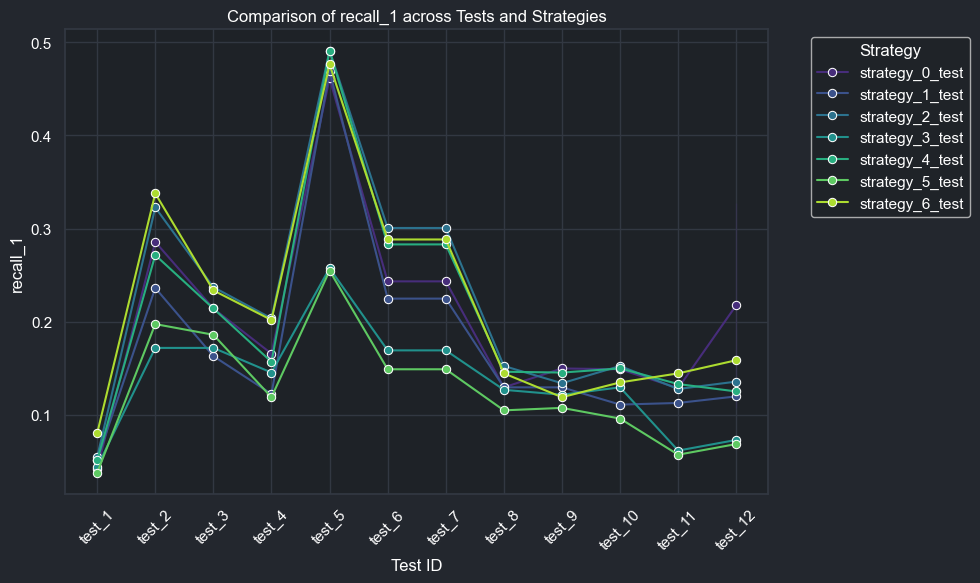

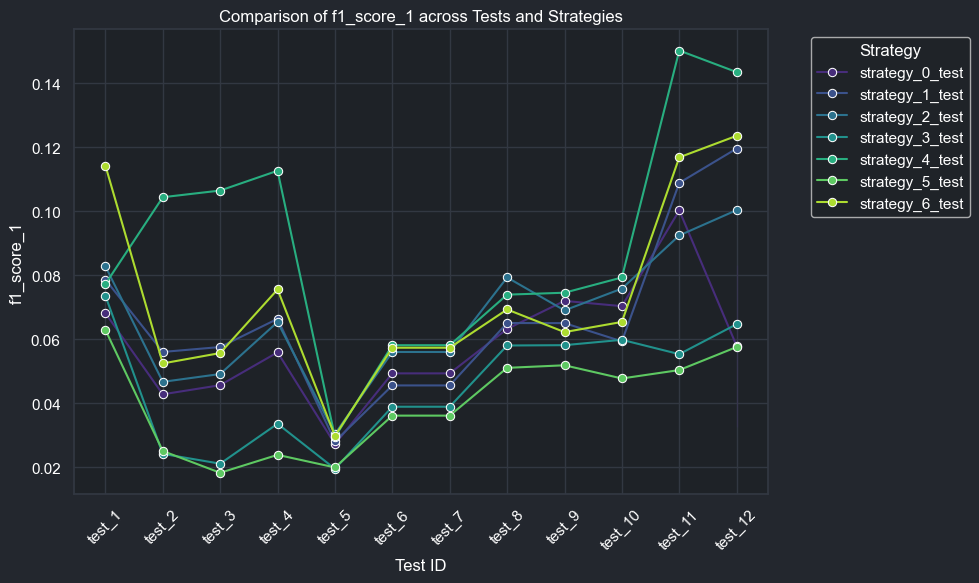

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# PLOT THEME
sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": "#1E2227",    # Plot Background
        "figure.facecolor": "#23272E",  # Main Background
        "axes.edgecolor": "#323842",    # Plot Border
        "grid.color": "#323842",        # Grid Color
        "text.color": "white",           # Text color
        "axes.labelcolor": "white",      # Label color
        "xtick.color": "white",          # X-axis tick color
        "ytick.color": "white",          # Y-axis tick color
        "axes.titlecolor": "white",      # Title color
    }
)

# Set up lists of metrics and strategies for plotting
metrics = ['precision_0', 'recall_0', 'f1_score_0', 'precision_1', 'recall_1', 'f1_score_1']
strategies = combined_df['data_label'].unique()

# Plotting each metric across all tests and strategies
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=combined_df, x='test_id', y=metric, hue='data_label', marker='o', 
        palette='viridis'  # Adjust color palette as needed
    )
    plt.title(f"Comparison of {metric} across Tests and Strategies")
    plt.xlabel("Test ID")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Best of the Tests and Strategies

In [4]:
# Calculate mean values for each metric across all tests for each strategy
summary_df = combined_df.groupby(['test_id', 'data_label'])[metrics].mean().reset_index()

# Find the best performing test and strategy for each metric by overall mean
best_performance = summary_df.groupby('test_id')[metrics].mean().idxmax()
best_strategies = summary_df.groupby('data_label')[metrics].mean().idxmax()

# Structure results for user
best_performance_results = best_performance.to_frame(name="Best Test by Metric").T
best_strategies_results = best_strategies.to_frame(name="Best Strategy by Metric").T

**Best Strategy**

In [5]:
best_strategy = "_".join(best_strategies_results["f1_score_1"].values[0].split("_")[:2]) + ".py"
print(f"The best strategy seems to be:", best_strategy)
best_strategies_results

The best strategy seems to be: strategy_4.py


,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1
Best Strategy by Metric,strategy_2_test,strategy_4_test,strategy_4_test,strategy_4_test,strategy_2_test,strategy_4_test


**Best Model Settings**

In [6]:
best_model = "-".join(best_performance_results["f1_score_1"].values[0].split("_")[:2])
print(f"The best model seems to have:", best_model)

best_test_location = os.path.join(BASE_TEST_DIR, best_model, "test_params.json")
with open(best_test_location, "r") as file:
    settings = file.read()
    print("\n---")
    print("The Best Model Set Up:")
    print("---")
    print(settings)

best_performance_results.head()

The best model seems to have: test-11

---
The Best Model Set Up:
---
{
  "test_name": "test-11",
  "data_path": "data/clean_transactions.pq",
  "split_date": "2019-10-01 00:00:00",
  "target_col": "Is Fraud",
  "datetime_col": "Datetime",
  "model_type": "CatBoost",
  "model_params": {
    "iterations": 1000,
    "learning_rate": 0.03,
    "depth": 8,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "verbose": 0,
    "random_state": 42,
    "task_type": "GPU",
    "devices": "0",
    "class_weights": [1, 10],
    "early_stopping_rounds": 100,
    "l2_leaf_reg": 3
  },
  "evaluation_file": "tests/test-11/evaluations.csv",
  "smote": true,
  "smote_sampling": 0.02
}



,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1
Best Test by Metric,test_5,test_1,test_1,test_1,test_5,test_11
